<a href="https://colab.research.google.com/github/mrzzy/ntu-sc1015/blob/eda/Attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import os
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# # Pulling from ZY S3
# reviews = pd.read_parquet(path="https://ntu-sc1015-yelp.s3.ap-southeast-1.amazonaws.com/yelp_reviews.parquet/part-00000-tid-8578034499791727984-cc969862-514e-46d4-990e-74c842c22502-1008-1-c000.snappy.parquet")
# reviews.head()

In [3]:
# reviews.info()

In [4]:
business = pd.read_json(path_or_buf="/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [5]:
categories = business["categories"]
print(categories)

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object


In [6]:
category_set = set()
category_count = Counter()
for category in categories:
  split = str(category).split(",")
  for index, data in enumerate(split):
    if data[0] == " ":
      split[index] = split[index][1:]
  category_count.update(split)
  for data in split:
  #   if data[0] == " ":
  #     data = data[1:]
  #   data.replace(" ", "")
  #   print(data)
    category_set.add(data)
  #   category_count.update(data)

# print(category_set)
print(category_count)

Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

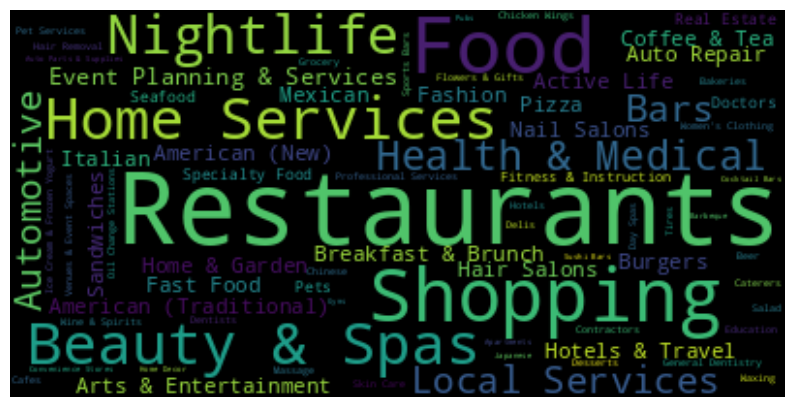

In [7]:
wordcloud = WordCloud().generate_from_frequencies(category_count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
cluster = 100
kmeans = KMeans(n_clusters = cluster)
vectorizer = TfidfVectorizer()
# print(list(category_set))
category_feature = vectorizer.fit_transform(list(category_set))

kmeans.fit(category_feature)
cluster_labels = kmeans.labels_

new_cat = []
for x in range(cluster):
  new_cat.append([])

for category, label in zip(list(category_set), cluster_labels):
  new_cat[label].append(category)

for x in new_cat:
  print(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Plus Size Fashion', 'Surfing', 'Preschools', 'Orthotics', 'Firewood', 'Buddhist Temples', 'Donuts', 'Sailing', 'Delis', 'Persian/Iranian', 'Flea Markets', 'Clowns', 'International Grocery', 'Jet Skis', 'Otologists', 'Conveyor Belt Sushi', 'Hotel bar', 'Tanning Beds', 'Chicken Wings', 'Utilities', 'Rafting/Kayaking', 'Herbs & Spices', 'Body Contouring', 'Endocrinologists', 'Neurologist', 'Ranches', 'Guns & Ammo', 'Pressure Washers', 'Beaches', 'Honey', 'Post Offices', 'Salad', 'Spanish', 'Scuba Diving', 'Pilates', 'Oncologist', 'Creperies', 'Waxing', 'Hot Air Balloons', 'Periodontists', 'Horse Racing', 'Tui Na', 'Pakistani', 'Himalayan/Nepalese', 'Ethnic Grocery', 'Fuel Docks', 'Ear Nose & Throat', 'Lebanese', 'Donburi', 'Taxidermy', 'Embassy', 'Structural Engineers', 'Heating & Air Conditioning/HVAC', 'Poutineries', 'Watches', 'Homeless Shelters', 'Indian', 'Damage Restoration', 'Casinos', 'Serbo Croatian', 'Ice Delivery', 'Opera & Ballet', 'Obstetricians & Gynecologists', 'Plumbing'

In [49]:
done_list = [
['Holistic Animal Care', 'Animal Physical Therapy', 'Animal Assisted Therapy', 'Animal Shelters', 'Pet Groomers', 'Pet Transportation', 'Pet Stores', 'Pet Insurance', 'Pet Waste Removal', 'Pet Cremation Services', 'Pet Services', 'Pet Breeders', 'Pet Hospice', 'Pet Sitting', 'Pet Adoption', 'Pet Boarding', 'Emergency Pet Hospital', 'Pet Photography', 'Pet Training']
,['Endocrinologists', 'Neurologist', 'Hospitals', 'Health Coach', 'Counseling & Mental Health', 'Health Retreats', 'Retina Specialists', 'Sleep Specialists', 'Infectious Disease Specialists', 'Vitamins & Supplements', 'Dental Hygienists', 'General Dentistry', 'Pediatric Dentists', 'Dentists', 'Dialysis Clinics', 'Storefront Clinics', 'Walk-in Clinics', 'Sperm Clinic', 'Cannabis Clinics', 'Surgeons', 'Spine Surgeons', 'Plastic Surgeons', 'Oral Surgeons', 'Cosmetic Surgeons', 'Cosmetic Dentists', 'Medical Centers', 'Medical Cannabis Referrals', 'Beauty & Spas', 'Day Spas', 'Health & Medical', 'Medical Supplies', 'Medical Law', 'Medical Transportation', 'Medical Spas', 'Addiction Medicine', 'Traditional Chinese Medicine', 'Sports Medicine', 'Undersea/Hyperbaric Medicine', 'Alternative Medicine', 'Concierge Medicine', 'Emergency Medicine', 'Vascular Medicine', 'Internal Medicine', 'Preventive Medicine']
,['Chimney Sweeps', 'Hearing Aid Providers', 'Community Service/Non-Profit', 'Internet Service Providers', 'Television Service Providers', 'Personal Assistants', 'Personal Chefs', 'Shipping Centers', 'Blood & Plasma Donation Centers', 'Weight Loss Centers', 'Cultural Center', 'Mailbox Centers', 'Ultrasound Imaging Centers', 'Faith-based Crisis Pregnancy Centers', 'Community Centers', 'Rehabilitation Center', 'Tutoring Centers', 'Recycling Center', 'Meditation Centers', 'Donation Center', 'Senior Centers', 'Visitor Centers', 'Crisis Pregnancy Centers', 'Pool Cleaners', 'Air Duct Cleaning', 'Solar Panel Cleaning', 'Dry Cleaning & Laundry', 'Dry Cleaning', 'Carpet Cleaning', 'Office Cleaning', 'Home Cleaning', 'Disc Golf', 'Golf', 'Golf Equipment', 'Photo Booth Rentals', 'Party Bike Rentals', 'Golf Lessons', 'Party Bus Rentals', 'Party Equipment Rentals', 'Vacation Rentals', 'Scooter Rentals', 'Bike Rentals', 'Golf Cart Rentals', 'Mini Golf', 'Beach Equipment Rentals', 'Bounce House Rentals', 'ATV Rentals/Tours', 'Stucco Services', 'Laundry Services', 'Holiday Decorating Services', 'Event Planning & Services', 'Grout Services', 'Lactation Services', 'Cremation Services', 'Demolition Services', 'Registration Services', 'Refinishing Services', 'Billing Services', 'Mobility Equipment Sales & Services', 'Printing Services', 'Crane Services', 'Auto Glass Services', 'Digitizing Services', 'Funeral Services & Cemeteries', 'Local Services', 'Personal Care Services', 'Public Services & Government', 'Diagnostic Services', 'Lice Services', 'Garage Door Services', 'Adoption Services', 'Grill Services', 'Metal Detector Services', 'Translation Services', 'Passport & Visa Services', 'Editorial Services', 'Balloon Services', 'Reproductive Health Services', 'Tree Services', 'Educational Services', 'Financial Services', 'Aquarium Services', 'Outdoor Power Equipment Services', 'Aviation Services', 'Eyebrow Services', 'Water Purification Services', 'Mortuary Services', 'Music Production Services', 'Backflow Services', 'Security Services', 'Legal Services', 'Elevator Services', 'Debt Relief Services', 'Portable Toilet Services', 'Musical Instrument Services', 'Travel Services', 'Excavation Services', 'Valet Services', 'Shredding Services', 'Fireplace Services', 'Piano Services', 'Lawn Services', 'Blow Dry/Out Services', 'Fire Protection Services', 'Septic Services', 'IT Services & Computer Repair', 'Threading Services', 'Payroll Services', 'Duplication Services', 'Nanny Services', 'Gutter Services', 'Professional Services', 'Packing Services', 'Home Services', 'Couriers & Delivery Services', 'Appraisal Services', 'Tax Services']
,['Door Sales/Installation', 'Home Theatre Installation', 'Windows Installation', 'Generator Installation/Repair', 'Countertop Installation', 'Windshield Installation & Repair', 'Sauna Installation & Repair', 'Home Network Installation', 'Carpet Installation', 'Insulation Installation', 'Drywall Installation & Repair', 'Water Heater Installation/Repair', 'Solar Installation', 'Motorcycle Repair', 'Mobile Home Repair', 'Appliances & Repair', 'Transmission Repair', 'Boat Repair', 'Bike Repair/Maintenance', 'Trailer Repair', 'Jewelry Repair', 'RV Repair', 'Bike Repair', 'Farm Equipment Repair', 'Electronics Repair', 'Clock Repair', 'Mobile Phone Repair', 'Commercial Truck Repair', 'Mobile Dent Repair', 'Watch Repair', 'Shoe Repair', 'Furniture Repair', 'Foundation Repair', 'Auto Repair']
,['Chicken Wings', 'Asian Fusion', 'Pan Asian', 'Noodles', 'Waffles', 'Herbs & Spices', 'Tonkatsu', 'Breakfast & Brunch', 'Bed & Breakfast', 'Hot Dogs', 'Coffee & Tea Supplies', 'Coffee Roasteries', 'Tea Rooms', 'Pancakes', 'Custom Cakes', 'Patisserie/Cake Shop', 'Ice Cream & Frozen Yogurt', 'Beer', 'Conveyor Belt Sushi', 'Ramen', 'Donburi', 'Coffee & Tea', 'Hong Kong Style Cafe', 'Bubble Tea', 'Hotel bar', 'Thai', 'Restaurants', 'Pop-Up Restaurants', 'Seafood', 'Seafood Markets', 'Food Tours', 'Desserts', 'Vegan', 'Teppanyaki', 'Wine Tasting Room', 'Parent Cafes', 'Themed Cafes', 'Internet Cafes', 'Popcorn Shops', 'Chocolatiers & Shops', 'Cheese Shops', 'Meat Shops', 'Herbal Shops', 'Pasta Shops', 'Shaved Ice', 'Salad', 'Acai Bowls', 'Cafeteria', 'Cafes', 'Fish & Chips', 'Donuts', 'Dim Sum', 'Cupcakes', 'Live/Raw Food', 'Ethnic Food', 'Specialty Food', 'Food Trucks', 'Comfort Food', 'Do-It-Yourself Food', 'Imported Food', 'Food Court', 'Fast Food', 'Soul Food', 'Food Banks', 'Food Delivery Services', 'Food Stands', 'Food']
,['Special Education', 'Education', 'Childbirth Education', 'Tasting Classes', 'Cheese Tasting Classes', 'Cardio Classes', 'Parenting Classes', 'Pole Dancing Classes', 'CPR Classes', 'Cycling Classes', 'Cooking Classes', 'Spin Classes', 'Wine Tasting Classes', 'First Aid Classes', 'Self-defense Classes', 'Barre Classes', 'Photography Classes', 'Art Classes', 'Vocational & Technical School', 'Dance Schools', 'Art Schools', 'Preschools', 'Montessori Schools', 'Ski Schools', 'Bartending Schools', 'Drama Schools', 'Swimming Lessons/Schools', 'Traffic Schools', 'Driving Schools', 'Specialty Schools', 'Private Schools', 'Language Schools', 'Elementary Schools', 'Nursing Schools', 'Waldorf Schools', 'Surf Schools', 'DUI Schools', 'Cosmetology Schools', 'Cooking Schools', 'Circus Schools', 'Massage Schools', 'Middle Schools & High Schools', 'Religious Schools']
,['Amusement Parks', 'Trampoline Parks', 'Mobile Home Parks', 'Parks', 'Water Parks', 'Dog Parks', 'Skate Parks', 'RV Parks']
,['Videos & Video Game Rental', 'Vacation Rental Agents', 'Karaoke Rental', 'Truck Rental', 'Home & Rental Insurance', 'Insurance', 'Life Insurance', 'RV Rental', 'Furniture Rental', 'Auto Insurance', 'Trailer Rental', 'Machine & Tool Rental', 'Motorcycle Rental', 'Clothing Rental', 'Bus Rental', 'Health Insurance Offices', 'Dumpster Rental', 'Game Truck Rental', 'Audio/Visual Equipment Rental']
,['Bartenders', 'Japanese Curry', 'Japanese', 'Beer Bar', 'Cigar Bars', 'Whiskey Bars', 'Bars', 'Cocktail Bars', 'Drive-Thru Bars', 'Tapas Bars', 'Hookah Bars', 'Sushi Bars', 'Sports Bars', 'Vermouth Bars', 'Gay Bars', 'Piano Bars', 'Dive Bars', 'Wine Bars', 'Oxygen Bars', 'Tiki Bars', 'Juice Bars & Smoothies', 'Champagne Bars', 'Beach Bars']
,['Business Law', 'Disability Law', 'Immigration Law', 'Criminal Defense Law', 'Elder Law', 'Employment Law', 'Tenant and Eviction Law', 'DUI Law', 'Workers Compensation Law', 'Consumer Law', 'Tax Law', 'Personal Injury Law', 'Social Security Law', 'Estate Planning Law', 'Bankruptcy Law', 'IP & Internet Law', 'Patent Law', 'Contract Law', 'Traffic Ticketing Law', 'Divorce & Family Law']
,['Club Crawl', 'Dance Clubs', 'Fencing Clubs', 'Supper Clubs', 'Social Clubs', 'Sports Clubs', 'Comedy Clubs', 'Country Clubs', 'Strip Clubs']
,['Tours', 'Historical Tours', 'Whale Watching Tours', 'Cannabis Tours', 'Beer Tours', 'Architectural Tours', 'Wine Tours', 'Walking Tours', 'Boat Tours', 'Aerial Tours', 'Scooter Tours', 'Bus Tours', 'Bike tours', 'Art Tours']
,['Bike Parking', 'Boat Parts & Supplies', 'Auto Parts & Supplies', 'Oil Change Stations', 'Gas Stations', 'EV Charging Stations', 'Motorcycle Gear', 'Motorcycle Parts & Supplies', 'Departments of Motor Vehicles', 'Motorsport Vehicle Repairs', 'Vehicle Wraps', 'Vehicle Shipping', 'Motorsport Vehicle Dealers', 'RV Dealers', 'Trailer Dealers', 'Aircraft Dealers', 'Golf Cart Dealers', 'Boat Dealers', 'Commercial Truck Dealers', 'Motorcycle Dealers', 'Car Auctions', 'Car Stereo Installation', 'Car Brokers', 'Car Wash', 'Car Window Tinting', 'Car Share Services', 'Used Car Dealers', 'Car Buyers', 'Car Dealers', 'Town Car Service', 'Car Inspectors', 'Hybrid Car Repair', 'Car Rental']
,['Ethnic Grocery', 'Grocery', 'International Grocery', 'Ethical Grocery']
,['Massage', 'Massage Therapy', 'Physical Therapy', 'Nail Salons', 'Nail Technicians', 'Laser Eye Surgery/Lasik', 'Tanning Beds', 'Tanning', 'Spray Tanning', 'Eyelash Service', 'Plus Size Fashion', 'Fashion', 'Urgent Care', 'Memory Care', 'Skin Care', 'Prenatal/Perinatal Care', 'Child Care & Day Care', 'Foot Care', 'Kids Hair Salons', 'Hair Salons', "Men's Hair Salons", 'Hair Extensions', 'Hair Stylists', 'Hair Removal', 'Tattoo', 'Junk Removal & Hauling', 'Snow Removal', 'Tattoo Removal', 'Laser Hair Removal', 'Hair Loss Centers']
,['Rafting/Kayaking', 'Jet Skis', 'Bubble Soccer', 'Soccer', 'Paintball', 'Scuba Diving', 'Free Diving', 'Diving', 'Dinner Theater', 'Drive-In Theater', "Children's Museums", 'Museums', 'Makeup Artists', 'Commissioned Artists', 'Henna Artists', 'Karaoke', 'Music Venues', 'Music & DVDs', 'Music & Video', 'Tennis', 'Glass Blowing', 'Glass & Mirrors', 'Community Gardens', 'Botanical Gardens', 'Climbing', 'Rock Climbing', 'Laser Tag', 'Gun/Rifle Ranges', 'Wildlife Control', 'Wildlife Hunting Ranges', 'Resorts', 'Ski Resorts', 'Zoos', 'Petting Zoos', 'Sailing', 'Surfing', 'Sports Psychologists', 'Professional Sports Teams', 'Sports Betting', 'Amateur Sports Teams', 'Dart Arenas', 'Stadiums & Arenas', 'Horse Racing', 'Racing Experience', 'Horse Boarding', 'Recreation Centers', 'Virtual Reality Centers', 'Leisure Centers', 'LAN Centers', 'Arcades', 'Adult', 'Adult Education', 'Adult Entertainment', 'Country Dance Halls', 'Pool & Billiards', 'Pool & Hot Tub Service', 'Bingo Halls', 'Hot Tub & Pool', 'Gyms', 'Interval Training Gyms', 'Circuit Training Gyms', 'Art Supplies', 'Art Space Rentals', 'Art Galleries', 'Art Consultants', 'Art Restoration', 'Art Museums', 'Art Installation']
,['Bikes', 'Jewelry', 'Leather Goods', 'Sporting Goods', 'Farming Equipment', 'Safety Equipment', 'High Fidelity Audio Equipment', 'Office Equipment', 'Sport Equipment Hire', 'Hockey Equipment', 'Lighting Fixtures & Equipment', 'Grilling Equipment', 'Fitness/Exercise Equipment', 'Rugs', 'Restaurant Supplies', 'Teacher Supplies', 'Packing Supplies', 'Brewing Supplies', 'Hunting & Fishing Supplies', 'Building Supplies', 'Knitting Supplies', 'Used', 'Used Bookstore', 'Kitchen & Bath', 'Kitchen Supplies', 'Kitchen Incubators', 'Luggage Storage', 'Luggage', 'Gold Buyers', 'Diamond Buyers', 'Beverage Store', 'Discount Store', 'Outdoor Furniture Stores', 'Furniture Stores', 'Photography Stores & Services', 'Video Game Stores', 'Traditional Clothing', "Men's Clothing", 'Ceremonial Clothing', 'Fur Clothing', "Women's Clothing", "Children's Clothing", 'Bespoke Clothing', 'Wholesale Stores', 'Fabric Stores', 'Outlet Stores', 'Organic Stores', 'Department Stores', 'Lighting Stores', 'Toy Stores', 'Candle Stores', 'Thrift Stores', 'Piano Stores', 'Convenience Stores', 'Candy Stores', 'Local Fish Stores', 'Paint Stores', 'Shoe Stores', 'Battery Stores', 'Hardware Stores', 'Water Stores', 'Safe Stores', 'Guitar Stores', 'Mobile Phones', 'Mobile Phone Accessories', 'Mobile Home Dealers', 'Formal Wear', 'Sports Wear', 'Dance Wear', 'Maternity Wear', 'Shopping', 'Shopping Centers', 'Personal Shopping', 'Golf Equipment Shops', 'Reptile Shops', 'Surf Shop', 'Chicken Shop', 'Bike Shop', 'Spiritual Shop', 'Bike Sharing', 'DIY Auto Shop', 'Vape Shops', 'Machine Shops', 'Horse Equipment Shops', 'Tobacco Shops', 'Bird Shops', 'Concept Shops', 'Gift Shops', 'Skate Shops', 'Head Shops', 'Body Shops', 'Souvenir Shops', 'Ski & Snowboard Shops', 'Pawn Shops', 'Hobby Shops', 'Dive Shops', 'Pop-up Shops', 'Trophy Shops', 'Homeless Shelters', 'Home Developers', 'Retirement Homes', 'Home Health Care', 'Home Decor', 'Home Energy Auditors', 'Home Inspectors', 'Home Automation', 'Home Window Tinting', 'Home & Garden', 'Home Organization', 'Home Staging', 'Homeowner Association']
,['Ayurveda', 'Scottish', 'Private Tutors', 'Private Investigation', 'Private Jet Charter', 'Housing Cooperatives', 'University Housing', 'Brazilian', 'Brazilian Jiu-jitsu', 'Haunted Houses', 'Guest Houses', 'Auction Houses', 'Halfway Houses', 'Furniture Reupholstery', 'Baby Gear & Furniture', 'Furniture Assembly', 'Doulas', 'Afghan', 'Taxidermy', 'Flowers', 'Flowers & Gifts', 'Latin American', 'American (New)', 'American (Traditional)', 'Airport Terminals', 'Airport Shuttles', 'Antiques', 'Vietnamese', 'Irish Pub', 'Irish', 'Nicaraguan', 'Awnings', 'Buses', 'Syrian', 'Indoor Playcentre', 'Indoor Landscaping', 'Trusts', 'Lahmacun', 'Recording & Rehearsal Studios', 'Dance Studios', 'Halotherapy', 'Environmental Abatement', 'Environmental Testing', 'Laboratory Testing', 'Chinese Martial Arts', 'Chinese', 'Australian', 'Property Management', 'Pain Management', 'Middle Eastern', 'Eastern European', 'Modern European', 'Airport Lounges', 'Lounges', 'Buddhist Temples', 'Hindu Temples', 'Striptease Dancers', 'Tui Na', 'Religious Items', 'Religious Organizations', 'Honduran', 'Auto Loan Providers', 'Auto Security', 'Auto Customization', 'Auto Upholstery', 'Auto Detailing', 'Laundromat', 'Wedding Planning', 'Wedding Chapels', 'Sheds & Outdoor Storage', 'Outdoor Movies', 'Self Storage', 'Outdoor Gear', 'Public Art', 'Public Adjusters', 'Public Relations', 'Public Transportation', 'Real Estate Agents', 'Estate Liquidation', 'Real Estate Law', 'Real Estate', 'Real Estate Services', 'Commercial Real Estate', 'Real Estate Photography', 'College Counseling', 'Career Counseling', 'Interlock Systems', 'Security Systems', 'Festivals', 'General Festivals', 'General Litigation', 'Architects', 'Landscape Architects', 'Radio Stations', 'Television Stations', 'Train Stations', 'Bus Stations', 'Service Stations', 'Smog Check Stations', 'Day Camps', 'Installment Loans', 'Check Cashing/Pay-day Loans', 'Title Loans', 'Travel Agents', 'Hotels', 'Hotels & Travel', 'Mass Media', 'Print Media', 'South African', 'African', 'Graphic Design', 'Product Design', 'Web Design', 'Interior Design', 'Synagogues', 'Town Hall', 'Beer Hall', 'Beer Gardens', 'Cannabis Collective', 'Cannabis Dispensaries', 'Hospitalists', '3D Printing', 'Screen Printing/T-Shirt Printing', 'Screen Printing', 'Izakaya', 'Poke', 'Body Contouring', 'Phlebologists', 'Handyman', 'Orthotics', 'Firewood', 'Wraps', 'Delis', 'Persian/Iranian', 'Clowns', 'Otologists', 'Utilities', 'Hungarian', 'Ranches', 'Guns & Ammo', 'Beaches', 'Honey', 'Post Offices', 'Spanish', 'Pilates', 'Oncologist', 'Creperies', 'Waxing', 'Periodontists', 'Himalayan/Nepalese', 'Fuel Docks', 'Ear Nose & Throat', 'Lebanese', 'Embassy', 'Structural Engineers', 'Heating & Air Conditioning/HVAC', 'Poutineries', 'Watches', 'Indian', 'Damage Restoration', 'Casinos', 'Serbo Croatian', 'Ice Delivery', 'Opera & Ballet', 'Obstetricians & Gynecologists', 'Plumbing', 'Tapas/Small Plates', 'Carousels', 'Somali', 'Bocce Ball', 'Sandblasting', 'Immunodermatologists', 'Radiologists', 'Saunas', 'Signmaking', 'Veterinarians', 'Sri Lankan', 'Automotive', 'Baseball Fields', 'Pediatricians', 'Flight Instruction', 'Gastroenterologist', 'Software Development', 'Laotian', 'Cajun/Creole', 'Shades & Blinds', 'Florists', 'Land Surveying', 'Eatertainment', 'Knife Sharpening', 'Kosher', 'Condominiums', 'Drones', 'DJs', 'Pizza', 'Eyewear & Opticians', 'CSA', 'Bar Crawl', 'Midwives', 'Musical Instruments & Teachers', 'Transportation', 'Salvadoran', 'Senegalese', 'Colombian', 'Paint-Your-Own Pottery', 'Basque', 'None', 'British', 'Tai Chi', 'Orthopedists', 'Roofing', 'Osteopaths', 'Bookbinding', 'Bridal', 'Neurotologists', 'Prosthodontists', 'Wigs', 'Ziplining', 'Cabaret', 'Taekwondo', 'Sewing & Alterations', 'Boxing', 'Races & Competitions', 'Stonemasons', 'Waterproofing', 'Aircraft Repairs', 'Bakeries', 'Fuzhou', 'Livestock Feed & Supply', 'Customized Merchandise', 'Acupuncture', 'Playgrounds', 'Street Vendors', 'Skilled Nursing', 'Orthodontists', 'Piercing', 'Masonry/Concrete', 'Barbeque', 'Limos', 'Iberian', 'Landmarks & Historical Buildings', 'Gemstones & Minerals', 'Calabrian', 'Delicatessen', 'Trinidadian', 'Soup', 'Notaries', 'Dog Walkers', 'Ticket Sales', 'Occupational Therapy', 'Pets', 'Behavior Analysts', 'Polish', 'Military Surplus', 'Singaporean', 'Party Supplies', 'Hawaiian', 'Cantonese', 'Batting Cages', 'Paragliding', 'Makerspaces', 'Veterans Organizations', 'Nudist', 'Propane', 'French', 'Teeth Whitening', 'Gardeners', 'Investing', 'Muay Thai', 'Ophthalmologists', 'Playsets', 'Ferries', 'Coffeeshops', 'Decks & Railing', 'House Sitters', 'Musicians', 'Metal Fabricators', 'Window Washing', 'Psychiatrists', 'Data Recovery', 'Hydro-jetting', 'Jazz & Blues', 'Sandwiches', 'Empanadas', 'Hazardous Waste Disposal', 'Aquariums', 'Naturopathic/Holistic', 'Mattresses', 'Halal', 'Books', 'Allergists', 'Archery', 'Steakhouses', 'Pita', 'Diagnostic Imaging', 'Permanent Makeup', 'Gymnastics', 'Lawyers', 'Estheticians', 'Floral Designers', 'Matchmakers', 'Cryotherapy', 'Sunglasses', 'Go Karts', 'Hainan', 'Shanghainese', 'Donairs', 'Dietitians', 'Trade Fairs', 'Tableware', 'Barbers', 'TV Mounting', 'Belgian', 'Gluten-Free', 'Caribbean', 'Mosques', 'Egyptian', 'Painters', 'Bail Bondsmen', 'Process Servers', 'Emergency Rooms', 'Computers', 'Bookstores', 'Powder Coating', 'Movers', 'Pedicabs', 'Nurseries & Gardening', 'Shaved Snow', 'Telecommunications', 'Cucina campana', 'Pool Halls', 'Holiday Decorations', 'Lakes', 'Fences & Gates', 'Apartment Agents', 'Czech', 'Banks & Credit Unions', 'International', 'Party & Event Planning', 'Airports', 'Psychologists', 'Cosmetics & Beauty Supply', 'Basketball Courts', 'Filipino', 'Currency Exchange', 'Carpeting', 'Vintage & Consignment', 'Calligraphy', 'Astrologers', 'Mediterranean', 'Churches', 'Peruvian', 'Rheumatologists', 'Snorkeling', 'Paint & Sip', 'Police Departments', 'Buffets', 'Gunsmith', 'Gastropubs', 'Fire Departments', 'Indonesian', 'Pickleball', 'Skiing', 'Psychics', 'Airsoft', 'Armenian', 'Costumes', 'Hydrotherapy', 'Bagels', 'Puerto Rican', 'Optometrists', 'Axe Throwing', 'Ukrainian', 'Advertising', 'Colleges & Universities', 'Moroccan', 'Mongolian', 'Challenge Courses', 'Audiologist', 'Canadian (New)', 'Marinas', 'Municipality', 'Hydroponics', 'Tiling', 'Well Drilling', 'Planetarium', 'Dumplings', 'Flyboarding', 'Airlines', 'Fruits & Veggies', 'Macarons', 'Face Painting', 'Burmese', 'Nutritionists', 'Libraries', 'Bicycles', 'Endodontists', 'Farmers Market', 'Meaderies', 'Speakeasies', 'Olive Oil', 'Venues & Event Spaces', 'Patio Coverings', 'Parklets', 'Mediators', 'Kickboxing', 'Pharmacy', 'Cheesesteaks', 'Accountants', 'Apartments', 'Reiki', 'Wineries', 'Brasseries', 'Parasailing', 'Oriental', 'Courthouses', 'Test Preparation', 'Doctors', 'Burgers', 'Wholesalers', 'Taiwanese', 'Austrian', 'Bookkeepers', 'Rest Stops', 'Brewpubs', 'Pubs', 'Boating', 'Supernatural Readings', 'Mags', 'Artificial Turf', 'Podiatrists', 'Anesthesiologists', 'Sugaring', 'Firearm Training', 'Smokehouse', 'Karate', 'Hats', 'Nurse Practitioner', 'Nightlife', 'German', 'Reflexology', 'Gelato', 'Mohels', 'Caricatures', 'Electronics', 'Uzbek', 'Arabic', 'Local Flavor', 'Cambodian', 'Kebab', 'Contractors', 'Turkish', 'Tubing', 'Vinyl Records', 'Fertility', 'Hakka', 'Cabinetry', 'Bowling', 'Pathologists', 'Marketing', 'Carpet Dyeing', 'Photographers', 'Gerontologists', 'Childproofing', 'Swimwear', 'Szechuan', 'Uniforms', 'Scavenger Hunts', 'Breweries', 'Distilleries', 'Badminton', 'Race Tracks', 'Trainers', '& Probates', 'Party Characters', 'Chiropractors', 'Southern', 'Trains', 'Skating Rinks', 'Biohazard Cleanup', 'Korean', 'Skydiving', 'Pretzels', 'Rolfing', 'Urologists', 'Greek', 'Cardiologists', 'Family Practice', 'Taxis', 'Hepatologists', 'Siding', 'Squash', 'Cards & Stationery', 'Diners', 'Dominican', 'Bangladeshi', 'Kiteboarding', 'Roof Inspectors', 'Videographers', 'Georgian', 'Engraving', 'Psychic Mediums', 'Shared Office Spaces', 'Silent Disco', 'Wheel & Rim Repair', 'Pumpkin Patches', 'Cideries', 'Malaysian', 'Acne Treatment', 'Sledding', 'Float Spa', 'Electricians', 'Roadside Assistance', 'Roman', 'Props', 'Pest Control', 'Sicilian', 'Fondue', 'Drugstores', 'Officiants', 'Wills', 'Experiences', 'Guamanian', 'Fingerprinting', 'Kombucha', 'Pulmonologist', 'Video/Film Production', 'Horseback Riding', 'Dermatologists', 'Wallpapering', 'Irrigation', 'Russian', 'Keys & Locksmiths', 'Placenta Encapsulations', 'Financial Advising', 'Trivia Hosts', 'Perfume', 'Assisted Living Facilities', 'Venezuelan', 'IV Hydration', 'Nephrologists', 'Framing', 'Magicians', 'Proctologists', 'Butcher', 'Hypnosis/Hypnotherapy', 'Prosthetics', 'Haitian', 'Cinema', 'Cheerleading', 'Cuban', 'Observatories', 'Bistros', 'Tuscan', 'Colonics', 'Appliances', 'Sardinian', 'Wine & Spirits', 'Fishing', 'Embroidery & Crochet', 'Argentine', 'Comic Books', 'Aestheticians', 'Shutters', 'Tires', 'Bicycle Paths', 'Swimming Pools', 'Mountain Biking', 'Elder Care Planning', 'Italian', 'Active Life', 'Flooring', 'Osteopathic Physicians', 'Towing', 'Campgrounds', 'Israeli', 'Hospice', 'Jails & Prisons', 'Portuguese', 'Christmas Trees', 'Boat Charters', 'Neuropathologists', 'Newspapers & Magazines', 'Tacos', 'Ethiopian', 'Arts & Crafts', 'Martial Arts', 'Arts & Entertainment', 'Performing Arts', 'Mortgage Lenders', 'Mortgage Brokers', 'Escape Games', 'Tabletop Games', 'Speech Therapists', 'Sex Therapists', 'Boot Camps', 'Summer Camps', 'Fireworks', 'Yoga', 'Falafel', 'Talent Agencies', 'Employment Agencies', 'Shoe Shine', 'Vegetarian', 'Aerial Fitness', 'Fitness & Instruction', 'Rodeo', 'Farms', 'Attraction Farms', 'Pick Your Own Farms', 'Boudoir Photography', 'Event Photography', 'Session Photography', 'Hostels', 'Flea Markets', 'Health Markets', 'Public Markets', 'Carpenters', 'Business Consulting', 'Business Financing', 'Mexican', 'New Mexican Cuisine', 'Junkyards', 'Kiosk', 'Yelp Events', 'Unofficial Yelp Events', 'Lingerie', 'Team Building Activities', 'Kids Activities', 'Qi Gong', 'Hot Air Balloons', 'Hot Pot', 'Pressure Washers', 'Scandinavian', 'Accessories', 'Life Coach', 'Vocal Coach', 'Water Delivery', 'Water Suppliers', 'Electricity Suppliers', 'Natural Gas Suppliers', 'Hiking', 'Landscaping', 'Caterers', 'Hang Gliding', 'Parking', 'Paddleboarding', 'Tex-Mex', 'Pakistani']
]